In [34]:
#carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [35]:
#Se não tiver as bibliotecas instale(remova as #, rode a célula e reinicie o kernel!):
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install pillow
#pip install wordcloud

### Dados obtidos de [InsideAirBnb](http://insideairbnb.com/get-the-data.html) - ROMA

In [36]:
#carregando base de dados
bnb = pd.read_csv('listings.csv', low_memory=False)


In [37]:
#olhando as primeiras 5 linhas do dataframe
bnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20200515045818,2020-05-18,"Single room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,"Very comfortable, clean and cozy flat in the n...",10 min by bus you can get to Piazza Venezia or...,none,It used to be an industrial area until late 80...,...,f,f,strict_new,f,f,5,0,5,0,0.11
1,2903,https://www.airbnb.com/rooms/2903,20200515045818,2020-05-17,Stay a night in Calisto6 B&B Rome,NaN,"Calisto6 B&B is an Italian city style ""bed and...","Calisto6 B&B is an Italian city style ""bed and...",none,NaN,...,f,f,strict_new,f,f,3,0,3,0,0.39
2,3079,https://www.airbnb.com/rooms/3079,20200515045818,2020-05-25,Cozy apartment (2-4)with Colisseum view,With the view of the Colisseum from the front ...,The apartment is located in one of Rome's most...,With the view of the Colisseum from the front ...,none,Monti neighborhood is one of the best areas in...,...,f,f,strict_new,f,t,6,6,0,0,0.15
3,11834,https://www.airbnb.com/rooms/11834,20200515045818,2020-05-16,"Roma ""Charming Boschetto House""",NaN,New Wi Fi installed!!! Boschetto Studio in loc...,New Wi Fi installed!!! Boschetto Studio in loc...,none,NaN,...,f,f,moderate_new,t,t,1,1,0,0,1.29
4,12398,https://www.airbnb.com/rooms/12398,20200515045818,2020-05-18,Casa Donatello - Home far from Home,Casa Donatello is a newly renovated two-bedroo...,********************************************* ...,Casa Donatello is a newly renovated two-bedroo...,none,You are at 15 minutes walking distance from h...,...,f,f,moderate_new,f,f,1,1,0,0,0.33


In [38]:
#selecionando colunas
features = ['description','neighborhood_overview']
bnb = bnb[features]

In [39]:
#Retirando valores faltantes das linhas
bnb = bnb.dropna(axis=0)

In [40]:
#Olhando as 5 linhas do novo dataframe
bnb.head()

,description,neighborhood_overview
0,10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...
2,With the view of the Colisseum from the front ...,Monti neighborhood is one of the best areas in...
4,Casa Donatello is a newly renovated two-bedroo...,You are at 15 minutes walking distance from h...
5,"A really nice apartment , close to the Sistine...",Prati's borough is very quiet even if is in th...
6,"Centrally located, B&B Vatican St. Peter is ju...",The B & B is located in one of the most beauti...


In [41]:
#Juntando todos os elementos em uma string para cada uma das colunas
bnb_description =" ".join(s for s in bnb['description'])
bnb_neighborhood =" ".join(s for s in bnb['neighborhood_overview'])

In [42]:
#definindo stopwords - Palavras que não devem ser incrementadas - conjunções
stopwords = set(STOPWORDS)

## Criando a WordCloud - Coluna description

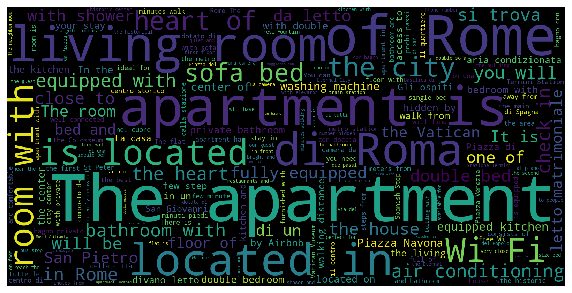

In [43]:
wordcloud_description = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(bnb_description)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud_description , interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud_description);

## Criando a WordCloud - Coluna description - Imagem da Bandeira!

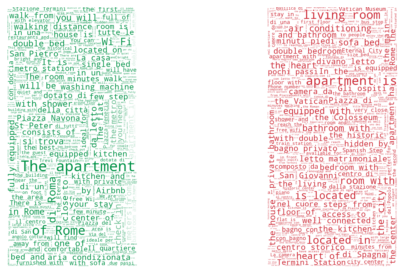

In [44]:
mask = np.array(Image.open("italia_bandeira.png"))
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(bnb_description)

# Criando a imagem colorida
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# Salvar a imagem
#plt.savefig("italia_bandeira_rome_airbnb.png", format="png")

plt.show()

## Criando a WordCloud - Coluna neighborhood_overview

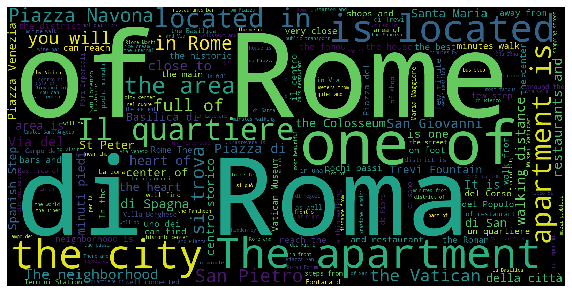

In [45]:
wordcloud_neighborhood = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(bnb_neighborhood)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud_neighborhood , interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud_neighborhood);

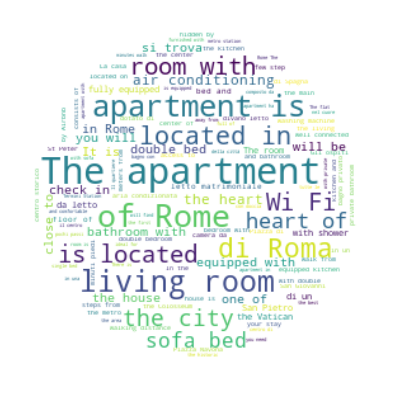

In [46]:
x, y = np.ogrid[:300, :300] #vetorizando
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2 #criando a mask
mask = 255 * mask.astype(int) #multiplicando pelo valor máximo de rgb
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(bnb_description)

# Criando a imagem colorida
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita, interpolation="bilinear")
plt.axis("off")

# Salvar a imagem
#plt.savefig("italia_bandeira_rome_airbnb.png", format="png")

plt.show()

## Criando a WordCloud - Coluna neighborhood_overview - Imagem da Bandeira!

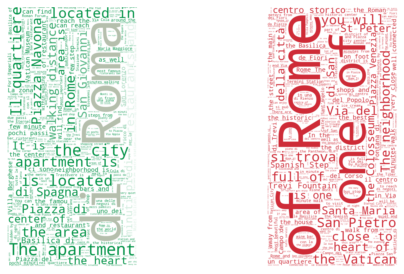

In [48]:
mask = np.array(Image.open("italia_bandeira.png"))
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(bnb_neighborhood)

# Criando a imagem colorida
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# Salvar a imagem
#plt.savefig("italia_bandeira_rome_airbnb.png", format="png")

plt.show()